In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import MSTL, STL

In [3]:
df = pd.read_csv('data/ETTh1.csv')
df = df.drop(columns=['date'])

In [5]:
train_len = 24*365
data = df['OT'].values
data = data[:train_len]

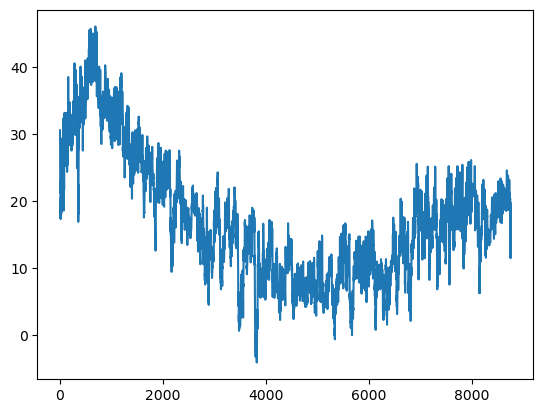

In [6]:
plt.plot(data)

In [25]:
lookback = 720

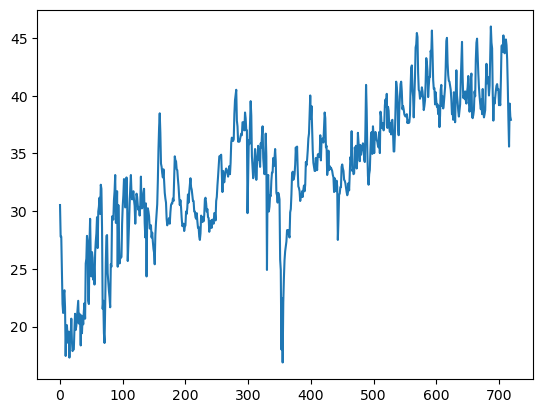

In [26]:
in_data = data[:lookback]
plt.plot(in_data)

In [27]:
def sma(x, window):
    start = window // 2
    end = window - start - 1
    x = np.pad(x, (start, end), mode='edge')
    return np.convolve(x, np.ones(window), 'valid') / window

In [47]:
def test_mstl(x, windows):
    seasons = []
    x = x.copy()
    orig_x = x.copy()
    sorted_windows = sorted(windows)
    for window in sorted_windows:
        trend = sma(x, window)
        season = x - trend
        seasons.append(season)
        x = trend

    for i, (window, season) in enumerate(zip(sorted_windows, seasons)):
        trend = sma(x + season, window)
        season = x + season - trend
        seasons[i] = season
    trend = orig_x - sum(seasons)
    fig, (axes) = plt.subplots(len(windows)+1)
    axes[0].plot(trend)
    axes[0].set_title('Trend')
    for ax, season, window in zip(axes[1:], seasons, windows):
        ax.plot(season)
        ax.set_title('Seasonality, window={}'.format(window))
    
    fig.tight_layout()
    plt.show()
    return x , seasons

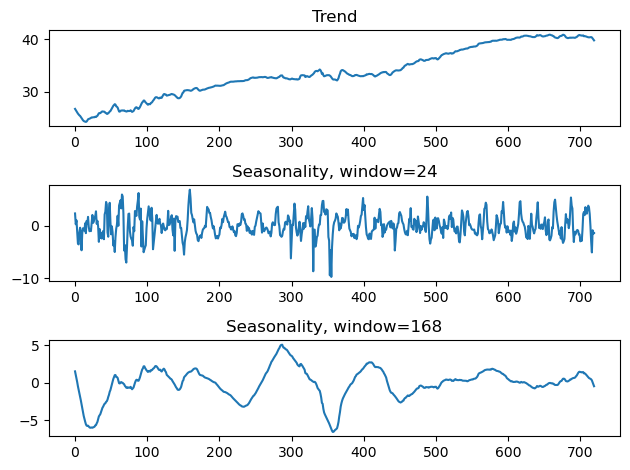

In [49]:
_ = test_mstl(in_data, [24, 24*7])

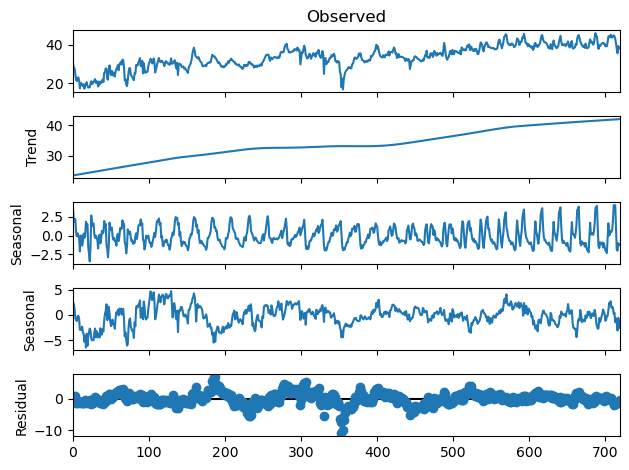

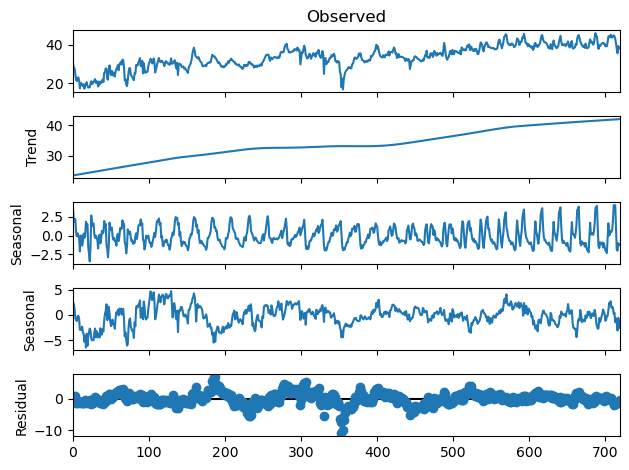

In [32]:
MSTL(in_data, periods=[24, 24*7]).fit().plot()